# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [4]:
df = pd.read_csv("historical financial.csv")

# Inspect the Data

In [6]:
df.shape

(1000, 13)

In [7]:
df.head()

,Customer_ID,Age,Employment_Status,Annual_Income,Loan_Amount,Loan_Purpose,Credit_History_Length,Number_of_Late_Payments,Current_Debt,Credit_Utilization_Ratio,Debt_to_Income_Ratio,Number_of_Open_Accounts,Loan_Status
0,1,56,Employed,33615,33252,Home,15,1,25988,0.07,0.72,10,0
1,2,69,Employed,45253,4832,Home,18,9,35507,0.73,0.16,10,0
2,3,46,Employed,68196,26275,Education,15,3,99244,0.56,0.85,13,0
3,4,32,Employed,52125,15901,Car,2,4,98644,0.36,0.73,2,1
4,5,60,Employed,84789,39213,Personal,13,1,95251,0.81,0.84,3,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Employment_Status         1000 non-null   object 
 3   Annual_Income             1000 non-null   int64  
 4   Loan_Amount               1000 non-null   int64  
 5   Loan_Purpose              1000 non-null   object 
 6   Credit_History_Length     1000 non-null   int64  
 7   Number_of_Late_Payments   1000 non-null   int64  
 8   Current_Debt              1000 non-null   int64  
 9   Credit_Utilization_Ratio  1000 non-null   float64
 10  Debt_to_Income_Ratio      1000 non-null   float64
 11  Number_of_Open_Accounts   1000 non-null   int64  
 12  Loan_Status               1000 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 101.7+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,1000.0,500.50000,288.819436,1.0,250.75,500.50,750.2500,1000.0
Age,1000.0,43.81900,14.991030,18.0,31.00,44.00,56.0000,69.0
Annual_Income,1000.0,50434.14100,14821.836770,4707.0,40820.50,50128.00,60176.7500,97896.0
Loan_Amount,1000.0,25576.94500,13981.031984,1082.0,13712.75,25696.50,37296.7500,49908.0
Credit_History_Length,1000.0,12.76400,7.004239,1.0,7.00,13.00,19.0000,24.0
Number_of_Late_Payments,1000.0,4.48900,2.900050,0.0,2.00,4.00,7.0000,9.0
Current_Debt,1000.0,49337.75300,29695.415288,132.0,23019.00,48056.00,75936.5000,99976.0
Credit_Utilization_Ratio,1000.0,0.50722,0.289415,0.0,0.27,0.51,0.7625,1.0
Debt_to_Income_Ratio,1000.0,0.50694,0.291694,0.0,0.26,0.50,0.7600,1.0
Number_of_Open_Accounts,1000.0,7.62200,4.057040,1.0,4.00,8.00,11.0000,14.0


In [10]:
df.columns

Index(['Customer_ID', 'Age', 'Employment_Status', 'Annual_Income',
       'Loan_Amount', 'Loan_Purpose', 'Credit_History_Length',
       'Number_of_Late_Payments', 'Current_Debt', 'Credit_Utilization_Ratio',
       'Debt_to_Income_Ratio', 'Number_of_Open_Accounts', 'Loan_Status'],
      dtype='object')

# Convert Data Types

In [12]:
df["Employment_Status"].unique()

array(['Employed', 'Unemployed', 'Self-employed'], dtype=object)

In [13]:
df["Employment_Status"].value_counts()

Employment_Status
Employed         711
Unemployed       194
Self-employed     95
Name: count, dtype: int64

In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
df["Employment_Status"] = label_encoder.fit_transform(df["Employment_Status"])

In [16]:
df["Employment_Status"].value_counts()

Employment_Status
0    711
2    194
1     95
Name: count, dtype: int64

In [17]:
df["Loan_Purpose"].value_counts()

Loan_Purpose
Home         425
Car          296
Education    187
Personal      92
Name: count, dtype: int64

In [18]:
df["Loan_Purpose"] = label_encoder.fit_transform(df["Loan_Purpose"])

In [19]:
df["Loan_Purpose"].value_counts()

Loan_Purpose
2    425
0    296
1    187
3     92
Name: count, dtype: int64

# Feature Engineering

In [21]:
age_bins = [18, 31, 51, 70]
age_labels = [0, 1, 2]
#0=>young, 1=>middle-aged, 2=>senior
df["Age_Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

In [22]:
df[['Age', 'Age_Group']].head()

,Age,Age_Group
0,56,2
1,69,2
2,46,1
3,32,1
4,60,2


In [23]:
income_bins = [0, 0.3, 0.6, 1.0]
income_labels = [0, 1, 2]
#0=>low,  1=>medium,  2=>high
df['Debt_to_Income_Category'] = pd.cut(df["Debt_to_Income_Ratio"], bins=income_bins, labels=income_labels, right=False)

In [24]:
df[['Debt_to_Income_Ratio', 'Debt_to_Income_Category']].head(10)

,Debt_to_Income_Ratio,Debt_to_Income_Category
0,0.72,2
1,0.16,0
2,0.85,2
3,0.73,2
4,0.84,2
5,0.30,1
6,0.32,1
7,0.67,2
8,0.03,0
9,0.73,2


# Outlier Detection and Removal

In [26]:
df.describe()

,Customer_ID,Age,Employment_Status,Annual_Income,Loan_Amount,Loan_Purpose,Credit_History_Length,Number_of_Late_Payments,Current_Debt,Credit_Utilization_Ratio,Debt_to_Income_Ratio,Number_of_Open_Accounts,Loan_Status
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,43.81900,0.483000,50434.14100,25576.945000,1.313000,12.764000,4.48900,49337.753000,0.507220,0.506940,7.62200,0.367000
std,288.819436,14.99103,0.798968,14821.83677,13981.031984,0.996004,7.004239,2.90005,29695.415288,0.289415,0.291694,4.05704,0.482228
min,1.000000,18.00000,0.000000,4707.00000,1082.000000,0.000000,1.000000,0.00000,132.000000,0.000000,0.000000,1.00000,0.000000
25%,250.750000,31.00000,0.000000,40820.50000,13712.750000,0.000000,7.000000,2.00000,23019.000000,0.270000,0.260000,4.00000,0.000000
50%,500.500000,44.00000,0.000000,50128.00000,25696.500000,2.000000,13.000000,4.00000,48056.000000,0.510000,0.500000,8.00000,0.000000
75%,750.250000,56.00000,1.000000,60176.75000,37296.750000,2.000000,19.000000,7.00000,75936.500000,0.762500,0.760000,11.00000,1.000000
max,1000.000000,69.00000,2.000000,97896.00000,49908.000000,3.000000,24.000000,9.00000,99976.000000,1.000000,1.000000,14.00000,1.000000


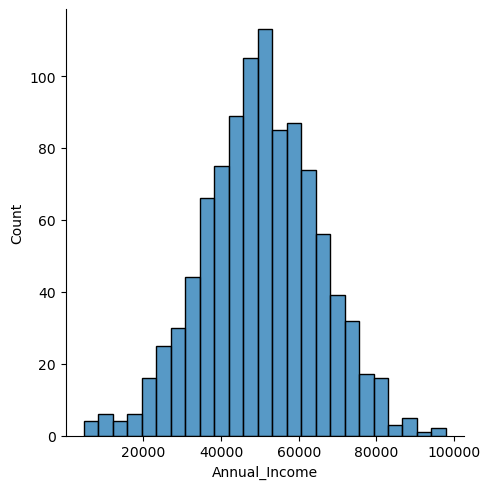

In [27]:
sns.displot(df["Annual_Income"])

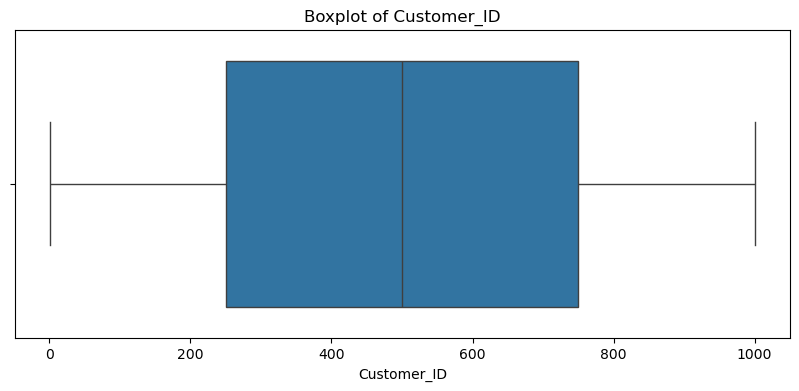

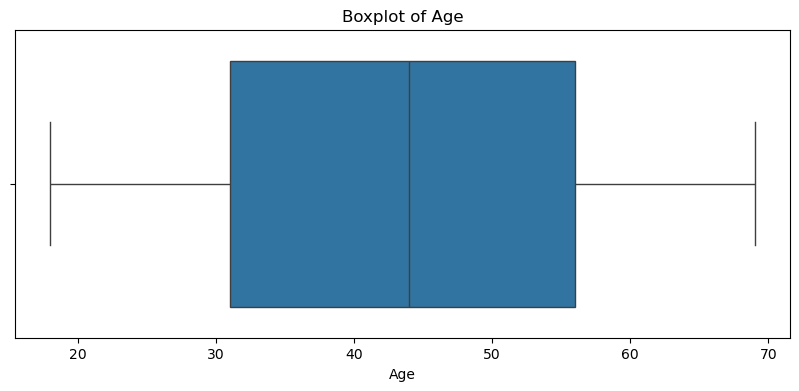

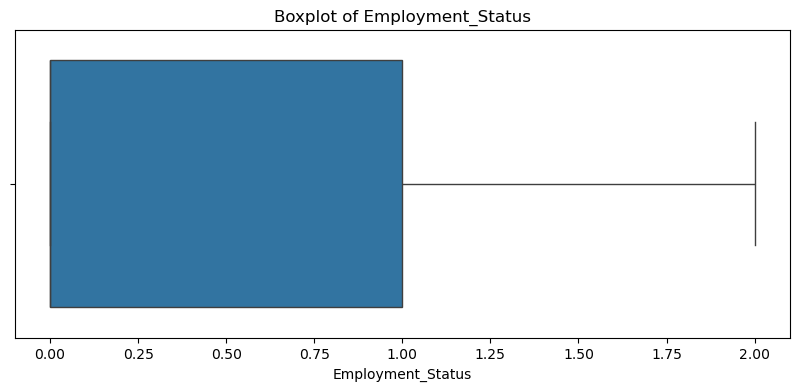

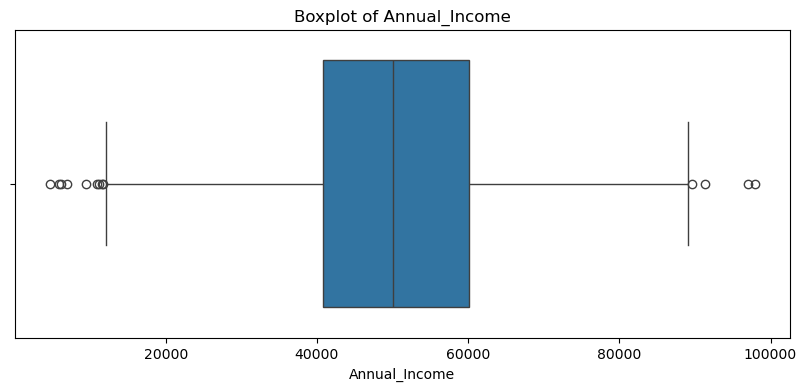

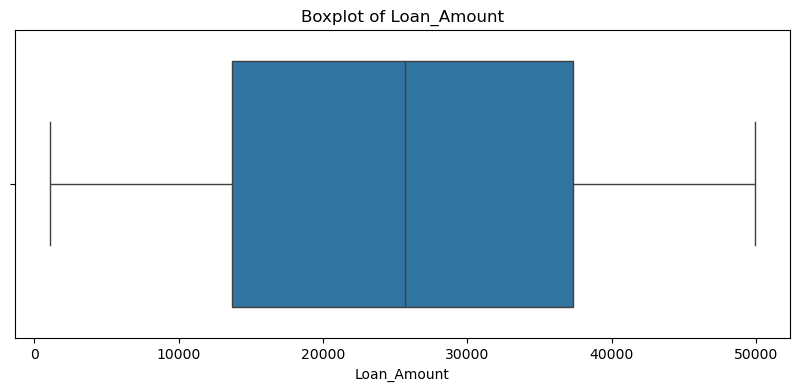

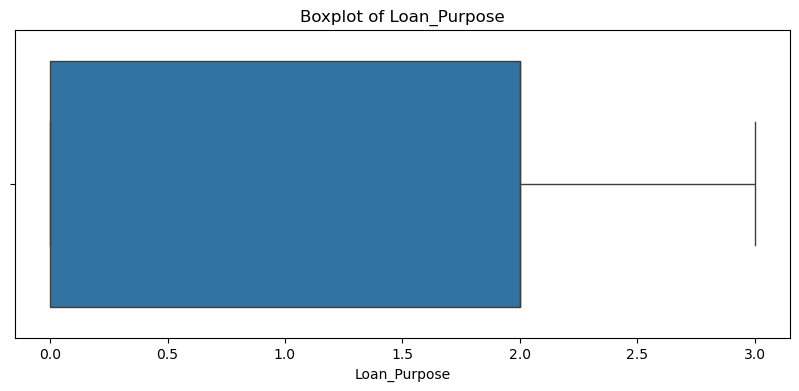

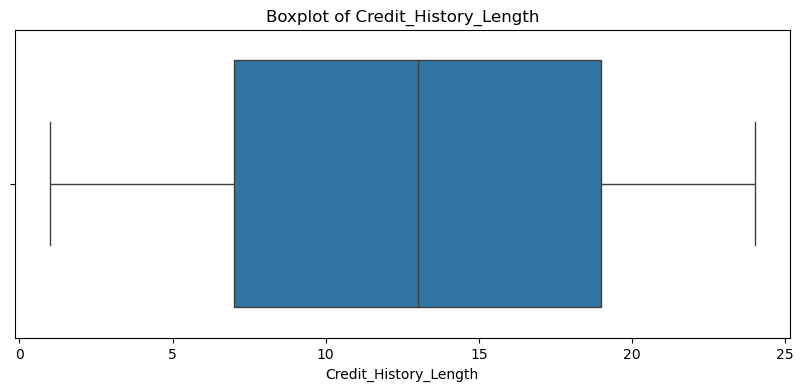

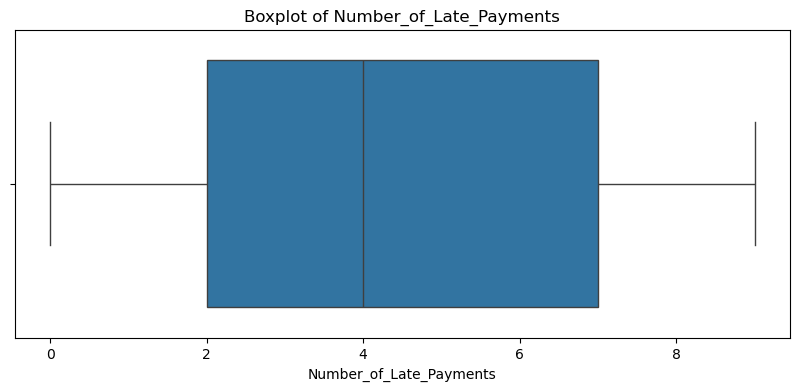

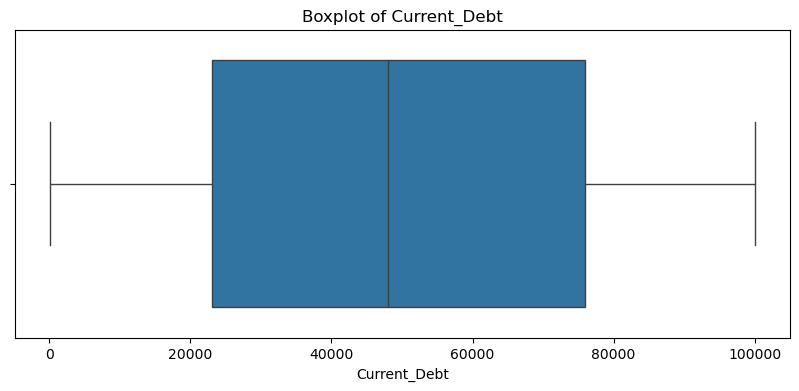

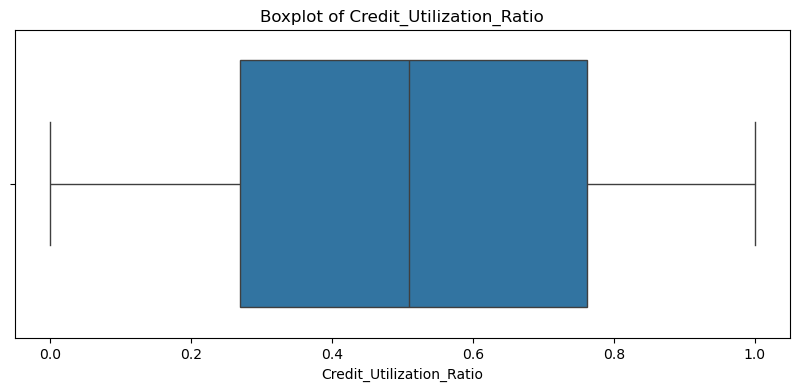

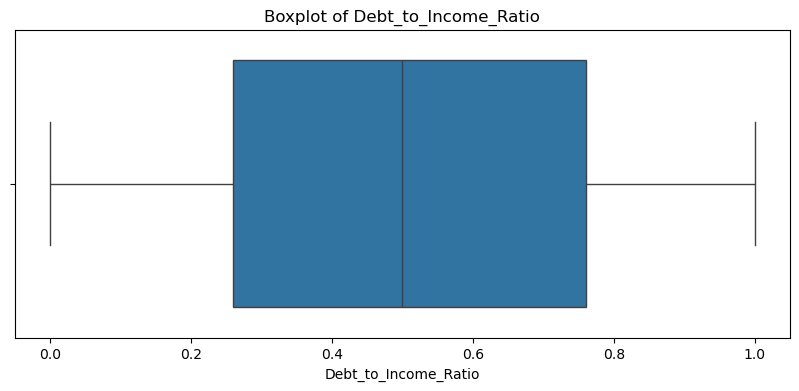

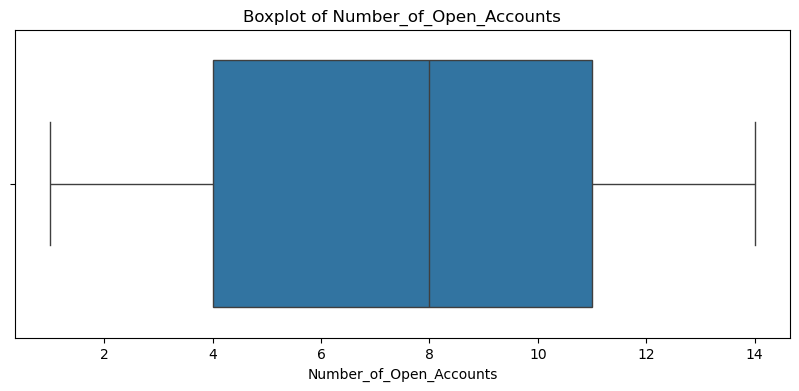

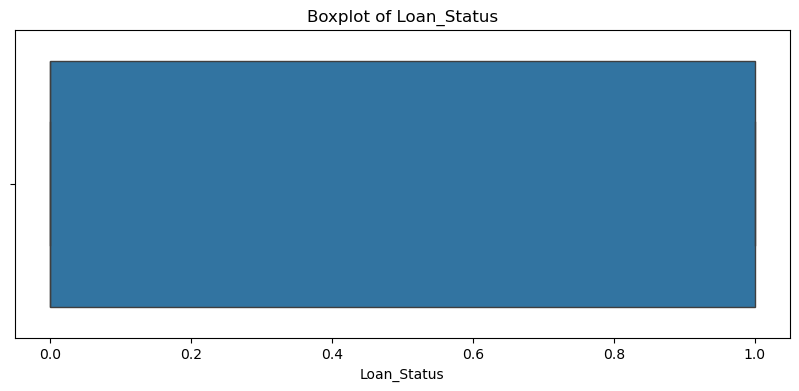

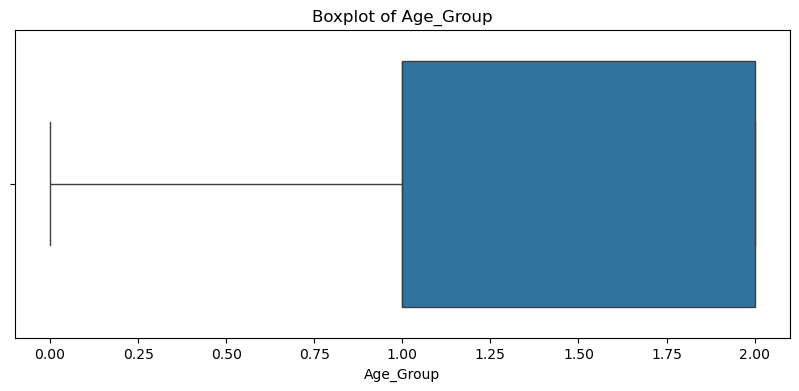

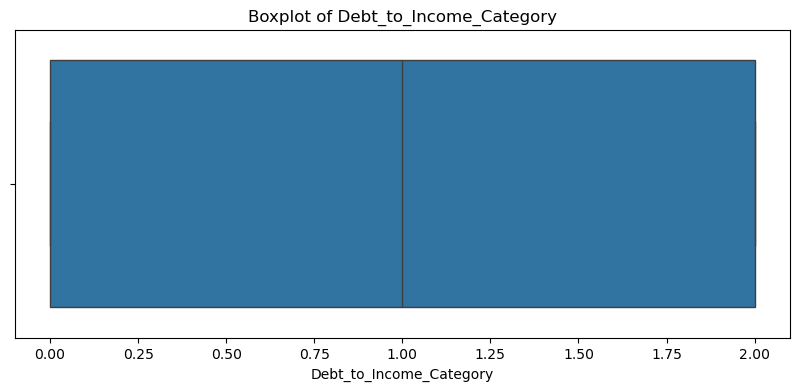

In [28]:
for col in df:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#"Annual_Income" has outlier

<Axes: xlabel='Annual_Income'>

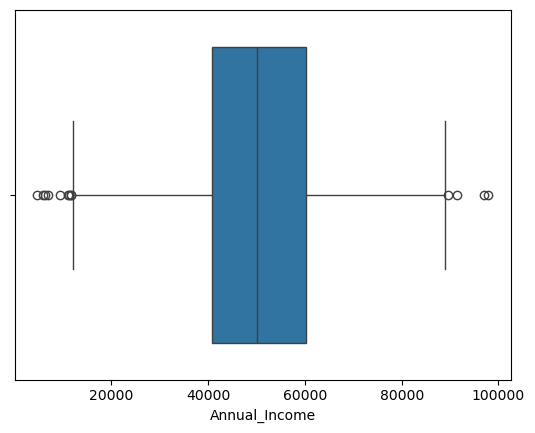

In [30]:
sns.boxplot(x=df["Annual_Income"])

In [31]:
#IQR
q1 = df.Annual_Income.quantile(0.25)
q3 = df.Annual_Income.quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

In [32]:
before_remove_outlier = df.shape
df = df[(df.Annual_Income < upper_limit) & (df.Annual_Income > lower_limit)]
after_remove_outlier = df.shape
print("before_remove_outlier =",before_remove_outlier)
print("after_remove_outlier =",after_remove_outlier)
print("outliers =",before_remove_outlier[0] - after_remove_outlier[0])

before_remove_outlier = (1000, 15)
after_remove_outlier = (987, 15)
outliers = 13


<Axes: xlabel='Annual_Income'>

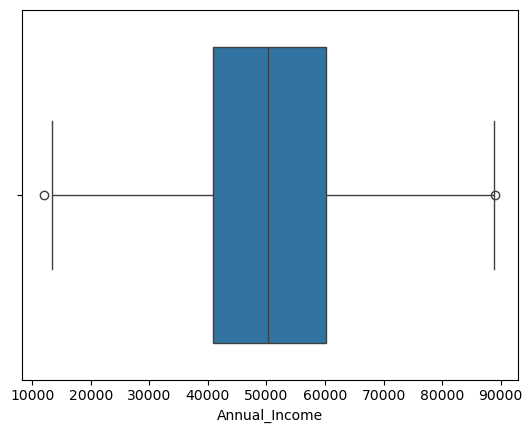

In [33]:
sns.boxplot(x=df["Annual_Income"])

# Visualizations

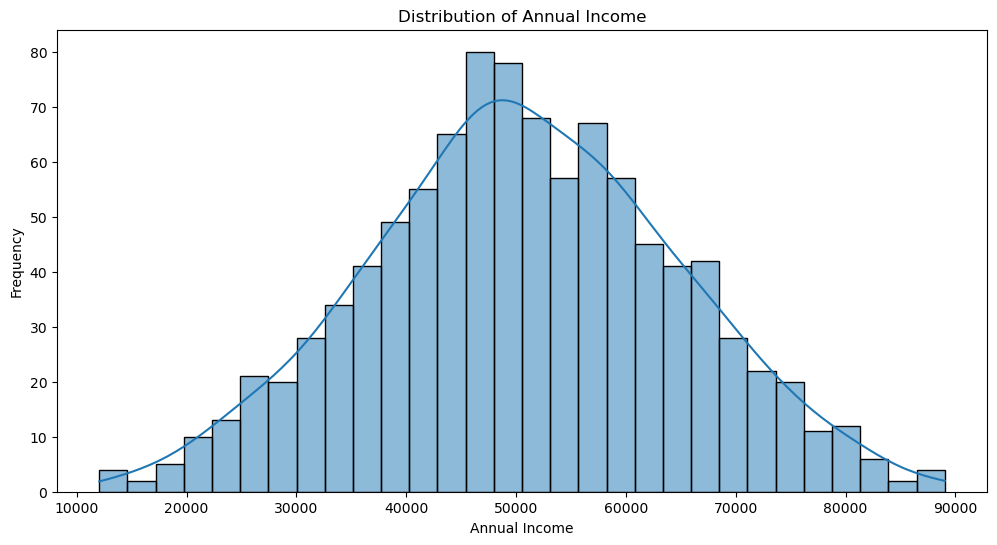

In [35]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Annual_Income'], bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

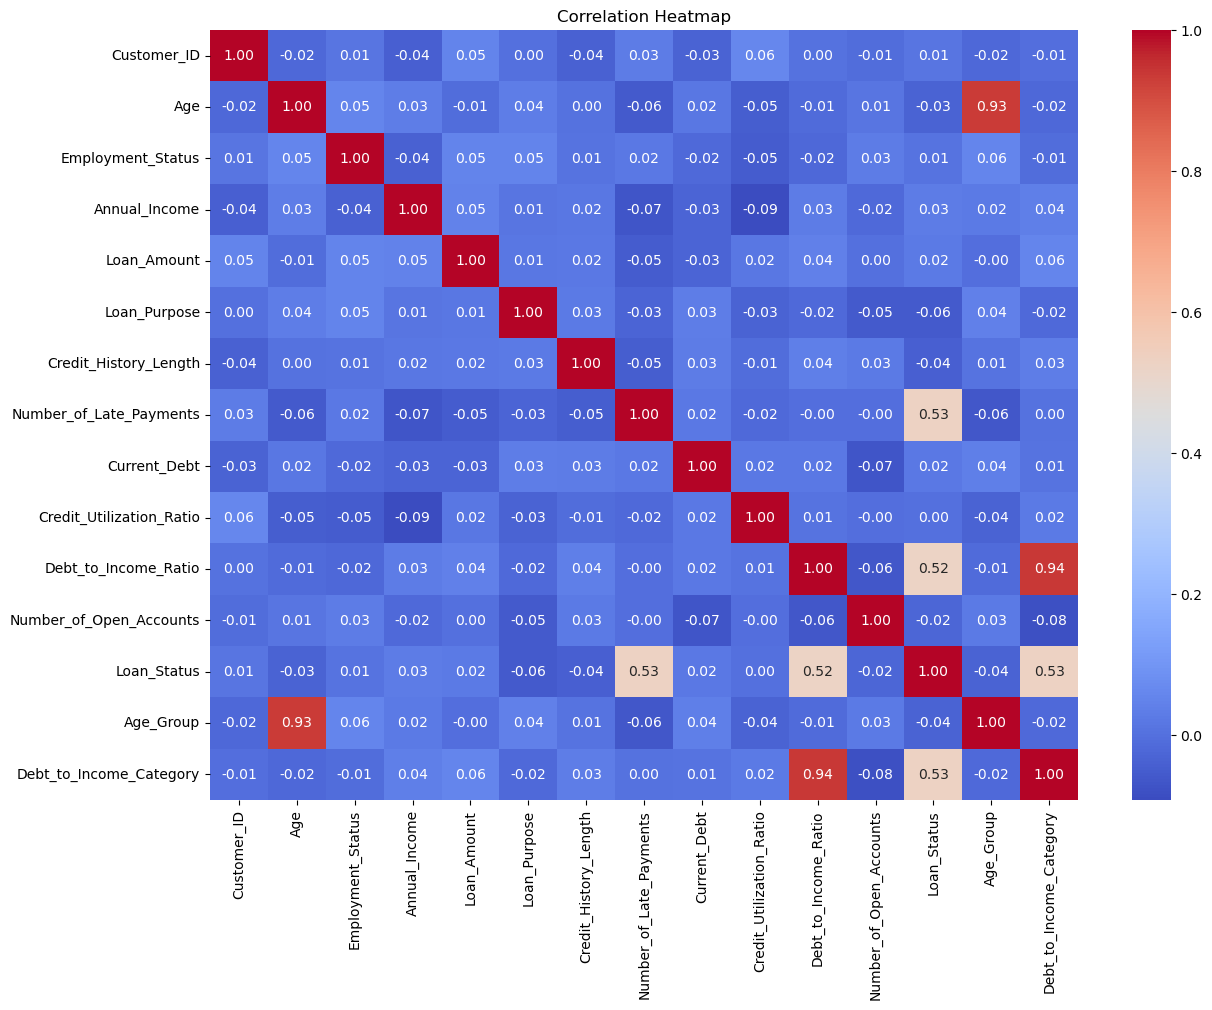

In [36]:
#Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

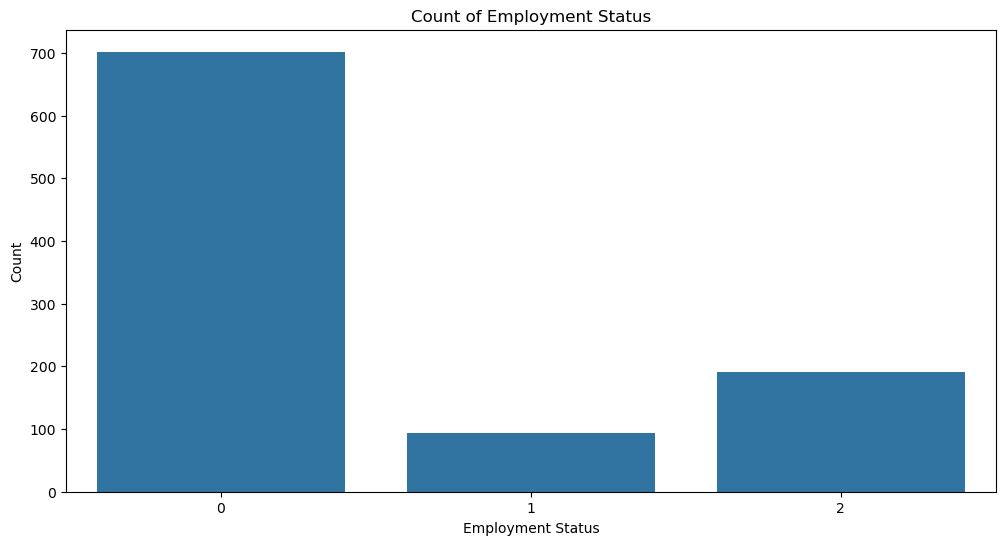

In [37]:
#Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Employment_Status', data=df)
plt.title('Count of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

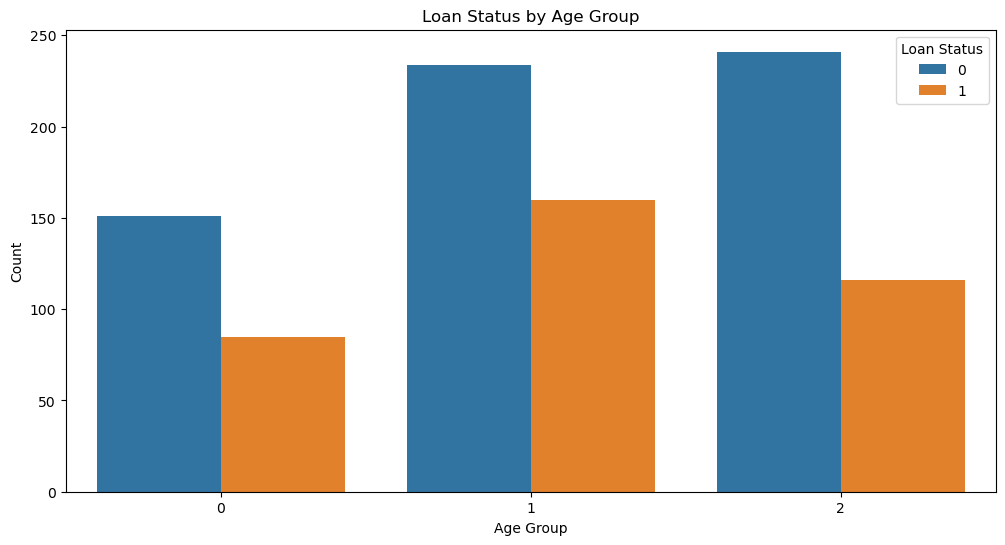

In [38]:
#Loan Status by Age Groups
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', hue='Loan_Status', data=df)
plt.title('Loan Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

# Handle Missing Values And Duplicates

In [40]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Employment_Status           0
Annual_Income               0
Loan_Amount                 0
Loan_Purpose                0
Credit_History_Length       0
Number_of_Late_Payments     0
Current_Debt                0
Credit_Utilization_Ratio    0
Debt_to_Income_Ratio        0
Number_of_Open_Accounts     0
Loan_Status                 0
Age_Group                   0
Debt_to_Income_Category     6
dtype: int64

In [41]:
df.duplicated().sum()

0

# Remove Unimportant Columns

In [43]:
df = df.drop(["Employment_Status", "Loan_Purpose", "Credit_History_Length", "Customer_ID"], axis=1)

In [44]:
df.columns

Index(['Age', 'Annual_Income', 'Loan_Amount', 'Number_of_Late_Payments',
       'Current_Debt', 'Credit_Utilization_Ratio', 'Debt_to_Income_Ratio',
       'Number_of_Open_Accounts', 'Loan_Status', 'Age_Group',
       'Debt_to_Income_Category'],
      dtype='object')

# Splitting Data

In [46]:
x = df.drop("Loan_Status", axis=1)
y = df.Loan_Status

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

# Scale Features

In [49]:
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
x_train

array([[ 1.27793214, -0.80289544,  0.98204387, ..., -1.12560926,
         1.12717177, -0.17533992],
       [ 0.26811403,  1.008238  ,  0.09911374, ..., -1.12560926,
        -0.17777541, -1.39032159],
       [-1.61687979,  0.47795759,  0.80127596, ...,  0.56806449,
        -1.48272259, -1.39032159],
       ...,
       [-0.27045563, -0.26429272, -0.49737094, ...,  1.05197127,
        -0.17777541,  1.03964175],
       [-0.27045563, -2.34430073,  0.58405777, ...,  0.0841577 ,
        -0.17777541,  1.03964175],
       [-1.21295254, -0.74001577,  0.0787694 , ...,  0.0841577 ,
        -1.48272259, -0.17533992]])

# Model Training

In [52]:
# Create an imputer
imputer = SimpleImputer(strategy='mean')

In [53]:
# Create a pipeline with the imputer and logistic regression
pipeline = make_pipeline(imputer, LogisticRegression())

In [54]:
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs'],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__max_iter': [100, 200]
}

In [55]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__max_iter': [100, 200],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [56]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Model Evaluation

In [58]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [59]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.92
Confusion Matrix:
[[188   8]
 [ 15  86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       196
           1       0.91      0.85      0.88       101

    accuracy                           0.92       297
   macro avg       0.92      0.91      0.91       297
weighted avg       0.92      0.92      0.92       297



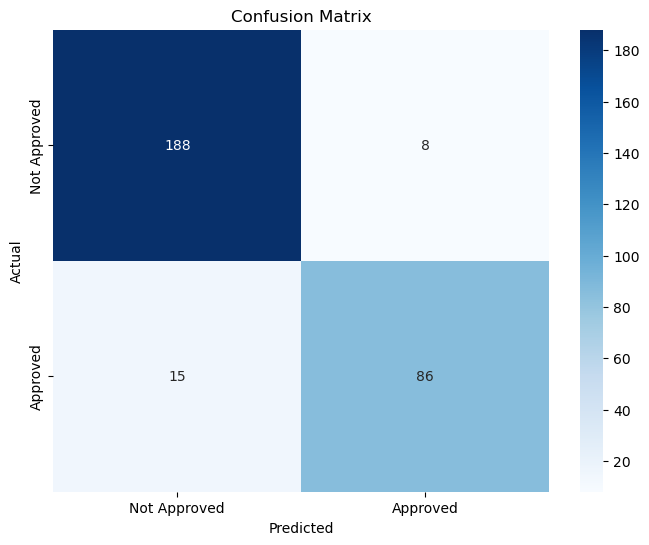

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='Blues',
           xticklabels=['Not Approved','Approved'],
           yticklabels=['Not Approved','Approved'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

# Save the Model

In [62]:
import joblib
joblib.dump(best_model, 'credit_scoring_model.pkl')

['credit_scoring_model.pkl']

# Make Predictions on New Data

In [64]:
loaded_model = joblib.load('credit_scoring_model.pkl')

In [65]:
df.head()

,Age,Annual_Income,Loan_Amount,Number_of_Late_Payments,Current_Debt,Credit_Utilization_Ratio,Debt_to_Income_Ratio,Number_of_Open_Accounts,Loan_Status,Age_Group,Debt_to_Income_Category
0,56,33615,33252,1,25988,0.07,0.72,10,0,2,2
1,69,45253,4832,9,35507,0.73,0.16,10,0,2,0
2,46,68196,26275,3,99244,0.56,0.85,13,0,1,2
3,32,52125,15901,4,98644,0.36,0.73,2,1,1,2
4,60,84789,39213,1,95251,0.81,0.84,3,0,2,2


In [66]:
# Example of new data
new_data = pd.DataFrame({
    'Age': [30],
    'Annual_Income': [50000],
    'Loan_Amount': [20000],
    'Number_of_Late_Payments': [1],
    'Current_Debt': [98245],
    'Credit_Utilization_Ratio': [0.88],
    'Debt_to_Income_Ratio': [0.68],
    'Number_of_Open_Accounts': [10],
    'Age_Group': [0],
    'Debt_to_Income_Category': [2] 
})

In [67]:
# Make predictions
prediction = loaded_model.predict(new_data)
print("Predicted Loan Status:", prediction)

Predicted Loan Status: [1]
